In [78]:
from datetime import datetime
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import scraping as sp
import pandas as pd

In [2]:
usrs = sp.test_find_reviewers('shes-funny-that-way', 10)

In [3]:
g = nx.Graph()
g.add_nodes_from(usr[:,0])

for usr in tqdm(usrs[:,0]):
    friends = sp.find_friends(usr)
    mask = np.in1d(usrs[:,0], friends)
    for friend in usrs[mask == True, 0]:
        g.add_edge(usr, friend)
    

100%|██████████| 110/110 [39:57<00:00, 21.79s/it] 


100%|██████████| 110/110 [00:00<00:00, 27569.37it/s]


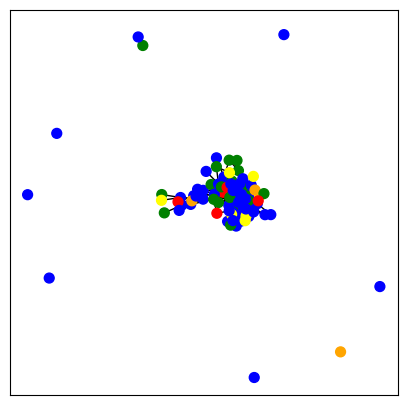

In [68]:
for i in tqdm(range(len(usrs[:,0]))):
    g.nodes[usrs[i,0]]['type'] = usrs[i,1].astype(int) 

color_state_map = {1: 'red', 2: 'red', 3: 'yellow', 4: 'yellow', 5: 'blue', 6: 'blue', 7: 'blue', 8: 'green', 9:'green', 10: 'orange'}
label = {}
for i in range(len(usrs[:,0])):
    label[i] = g.nodes[usrs[i,0]]["type"]
plt.figure(3,figsize=(5,5))
nx.draw_networkx(g, node_color= [color_state_map[g.nodes[usrs[i, 0]]['type']] for i in range(len(g.nodes(data=True)))], with_labels = False, node_size=50)
plt.show()

In [74]:
usrs2 = sp.find_scores('shes-funny-that-way')

In [82]:
df = pd.DataFrame(usrs2)
df.to_csv('C:/Users/samue/OneDrive/Documents/atip/atip/userfriends/usrs.csv')

In [84]:
s = nx.Graph()
s.add_nodes_from(usrs2[:,0])
print(len(s.nodes))

for usr in tqdm(usrs2[:,0]):
    friends = sp.find_friends(usr)
    df = pd.DataFrame(friends)
    df.to_csv('C:/Users/samue/OneDrive/Documents/atip/atip/userfriends/' + usr + '.csv')
    mask = np.in1d(usrs2[:,0], friends)
    for friend in usrs2[mask == True, 0]:
        s.add_edge(usr, friend)

1875


 93%|█████████▎| 1768/1891 [2:56:21<18:37,  9.08s/it]   

Connection error, retrying in 1s...


100%|██████████| 1891/1891 [3:09:03<00:00,  6.00s/it]


100%|██████████| 1891/1891 [00:00<00:00, 65386.34it/s]


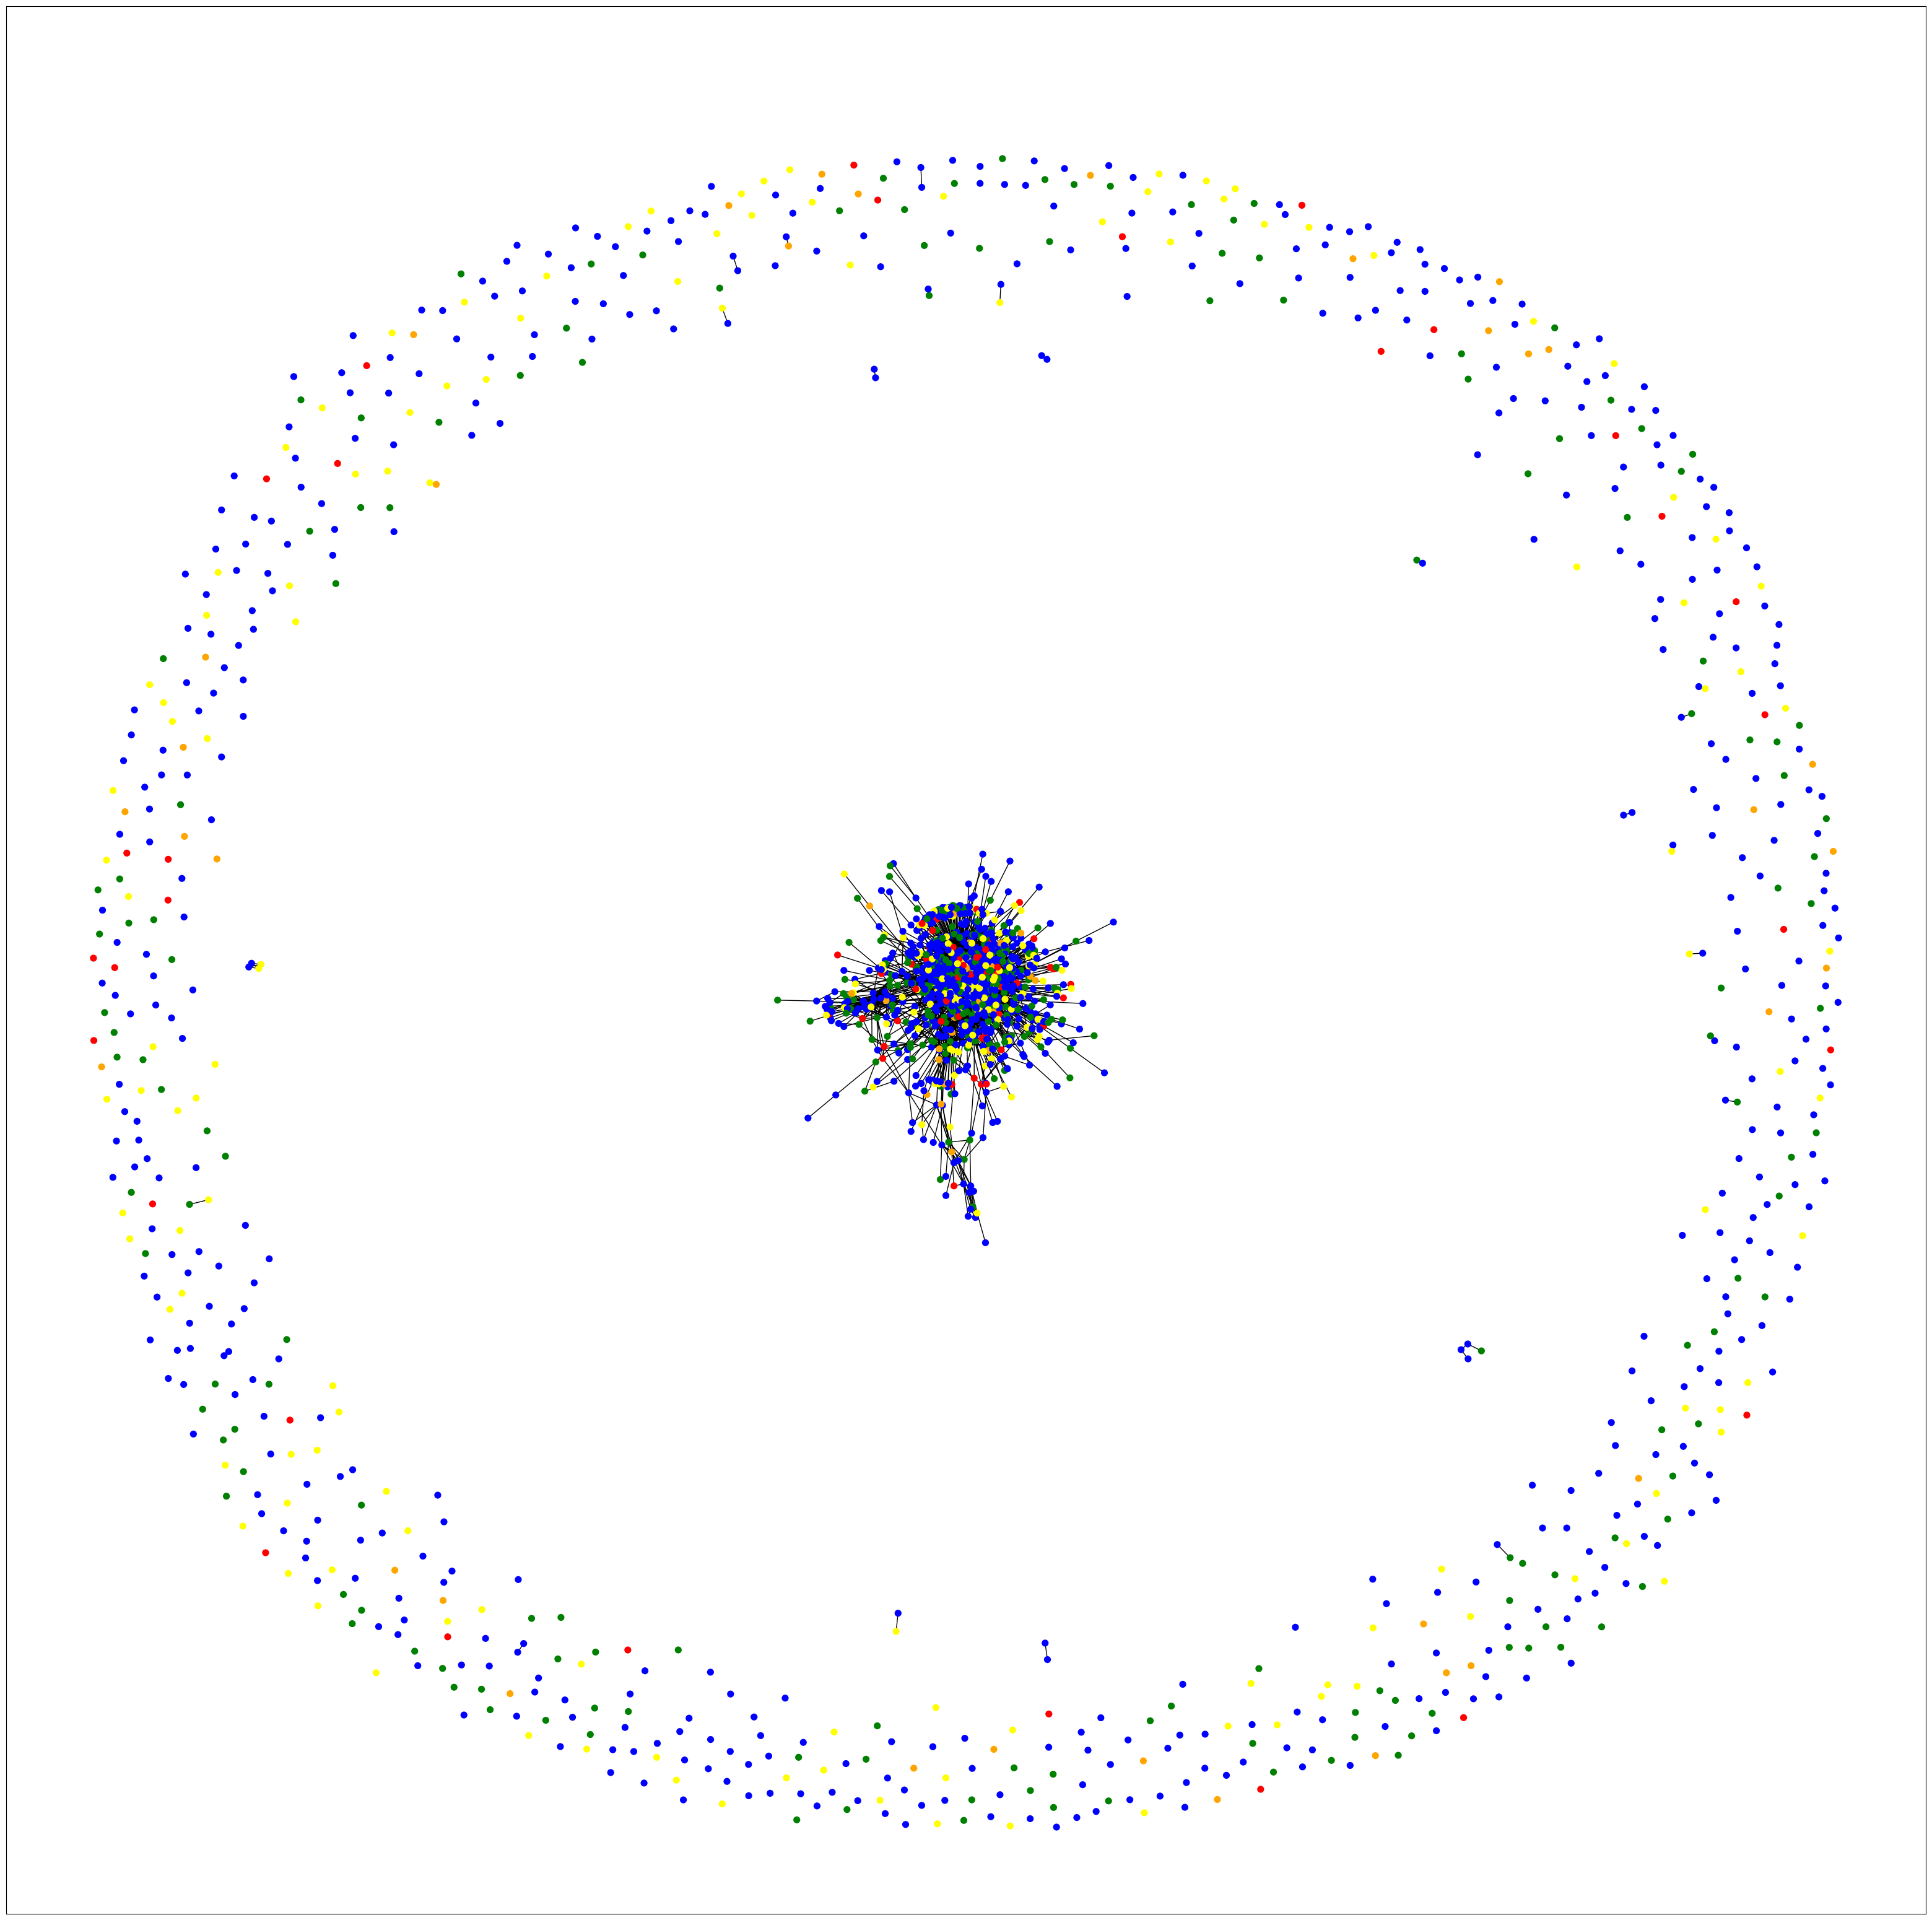

In [96]:
for i in tqdm(range(len(usrs2[:,0]))):
    s.nodes[usrs2[i,0]]['type'] = usrs2[i,1].astype(int) 

color_state_map = {1: 'red', 2: 'red', 3: 'yellow', 4: 'yellow', 5: 'blue', 6: 'blue', 7: 'blue', 8: 'green', 9:'green', 10: 'orange'}

plt.figure(3,figsize=(40,40))
nx.draw_networkx(s, node_color= [color_state_map[s.nodes[usrs2[i, 0]]['type']] for i in range(len(s.nodes(data=True)))], with_labels = False, node_size=50)
plt.show()